## Create a Rectilinear Test Grid

This notebook creates a rectilinear grid to test the xRegridHydromet program. This will serve as the source grid that would be regridded to the destination grid. A corresponding notebook outlining the creation of the destination grid [can be found here](./CreateWRFtestgrid.ipynb).

### 1. Setup

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Coordinates of test grid extent
lat_s = 42.0
lat_n = 44.0
lon_w = -117.0
lon_e = -115.0

res = 0.125 # Resolution in degrees

testfileoutput = '../tests/testsrc/testsrcgrid.nc' # Name of output grid

### 2. Create Coordinate Axes
#### 2.1 Create Latitude Coordinate Axis

In [2]:
lat = np.arange(lat_s, lat_n+res, res)
print(lat)

[42.    42.125 42.25  42.375 42.5   42.625 42.75  42.875 43.    43.125
 43.25  43.375 43.5   43.625 43.75  43.875 44.   ]


#### 2.2 Create Longitude Coordinate Axis

In [3]:
lon = np.arange(lon_w, lon_e+res, res)
print(lon)

[-117.    -116.875 -116.75  -116.625 -116.5   -116.375 -116.25  -116.125
 -116.    -115.875 -115.75  -115.625 -115.5   -115.375 -115.25  -115.125
 -115.   ]


#### 2.3 Create Synthetic Array of Grid Data

In [4]:
griddata = np.arange(1,lat.size*lon.size+1).reshape(lat.size,lon.size)

### 2.4 Plot the Data

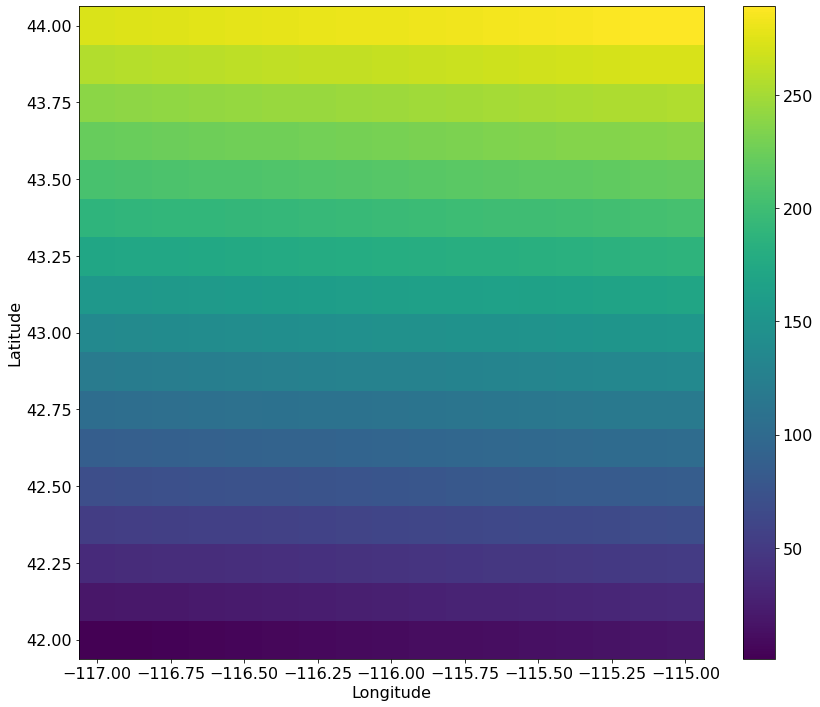

In [5]:
plt.figure(figsize=(14,12))
plt.rcParams.update({'font.size': 16})
plt.pcolor(lon,lat,griddata)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 3. Create `xArray` Dataset
#### 3.1 Create the DataArray and Dataset

In [6]:
da_testsrc = xr.DataArray(data=griddata, dims=["lat", "lon"], coords=[lat,lon])
ds_testsrc = da_testsrc.to_dataset(name='test_data')
print(ds_testsrc)

<xarray.Dataset>
Dimensions:    (lat: 17, lon: 17)
Coordinates:
  * lat        (lat) float64 42.0 42.12 42.25 42.38 ... 43.62 43.75 43.88 44.0
  * lon        (lon) float64 -117.0 -116.9 -116.8 ... -115.2 -115.1 -115.0
Data variables:
    test_data  (lat, lon) int64 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289


#### 3.2 Plot from `xArray` to Confirm

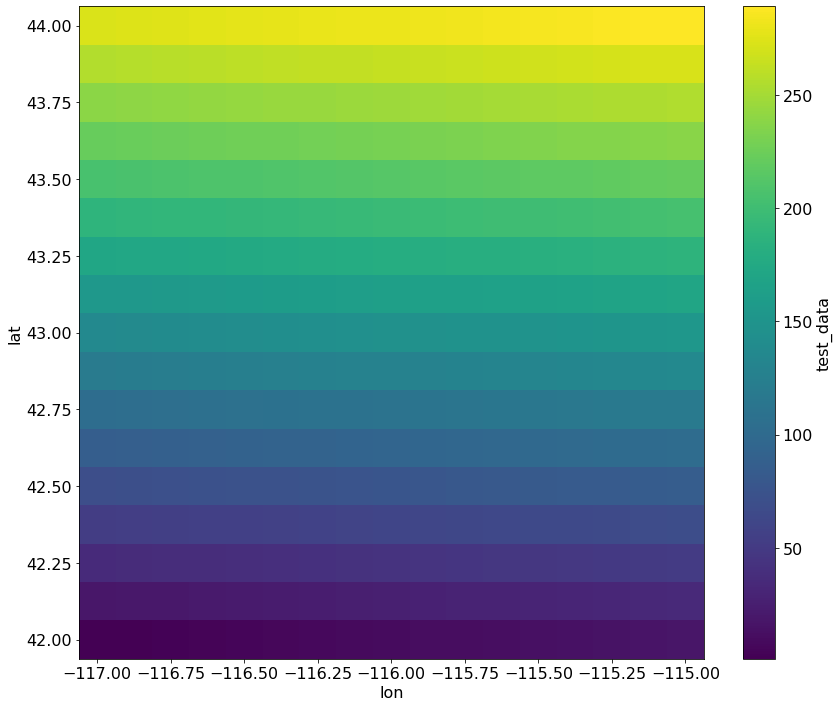

In [7]:
ds_testsrc['test_data'].plot(figsize=(14,12))

#### 3.3 Save Source Grid to NetCDF File

In [8]:
ds_testsrc.to_netcdf(testfileoutput)